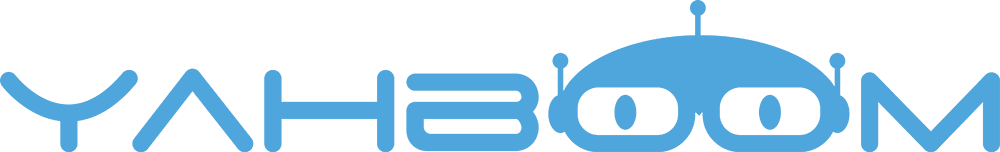

In [ ]:
#!/usr/bin/env python
# coding: utf-8
import cv2 as cv
import threading
from time import sleep
import ipywidgets as widgets
from IPython.display import display
from single_garbage_identify import single_garbage_identify
from Raspbot_Lib import Raspbot
import sys
sys.path.append('/home/pi/software/oled_yahboom/')
from yahboom_oled import *
oled = Yahboom_OLED(debug=False)

In [ ]:
bot = Raspbot()
def servo_reset():
    bot.Ctrl_Servo(1,90)
    bot.Ctrl_Servo(2,25)
servo_reset()

In [ ]:
single_garbage = single_garbage_identify()
model = "General"

In [ ]:
button_layout      = widgets.Layout(width='320px', height='60px', align_self='center')
output = widgets.Output()
# 退出
exit_button = widgets.Button(description='Exit', button_style='danger', layout=button_layout)
imgbox = widgets.Image(format='jpg', height=480, width=640, layout=widgets.Layout(align_self='center'))
controls_box = widgets.VBox([imgbox, exit_button], layout=widgets.Layout(align_self='center'))

In [ ]:
def exit_button_Callback(value):
    global model
    model = 'Exit'
    with output: print(model)
exit_button.on_click(exit_button_Callback)

In [ ]:
def camera():
    # 打开摄像头 Open camera
    capture = cv.VideoCapture(0)
    capture.set(cv.CAP_PROP_BRIGHTNESS, 10) #设置亮度 -64 - 64  0.0 Set Brightness -64 - 64 0.0
    capture.set(cv.CAP_PROP_CONTRAST, 2.0) #设置对比度 -64 - 64  2.0 Set Contrast -64 - 64 2.0
    capture.set(cv.CAP_PROP_EXPOSURE, 1.0) #设置曝光值 1.0 - 5000  156.0 Set the exposure value 1.0 - 5000 156.0
        # 当摄像头正常打开的情况下循环执行
    while capture.isOpened():
        try:
            _, img = capture.read()
            img = cv.resize(img, (640, 480))
            img = single_garbage.single_garbage_run(img)
            if model == 'Exit':
                cv.destroyAllWindows()
                capture.release()
                oled.init_oled_process() #初始化oled进程 Initialize oled process
                # 恢复屏幕基础数据显示 Restore basic data display on screen
                os.system("python3 /home/pi/software/oled_yahboom/yahboom_oled.py &")
                bot.Ctrl_Servo(1,90)
                bot.Ctrl_Servo(2,25)
                break
            imgbox.value = cv.imencode('.jpg', img)[1].tobytes()
        except KeyboardInterrupt:capture.release()

In [ ]:
# Please place the block in the center
# 请将积木块正放在中心
display(controls_box,output)
threading.Thread(target=camera, ).start()